mean 0.826537532839408
variance: 0.0760156855026238
accept the alternative hypothesis
15024
2.770195955872026
2.770195955872026


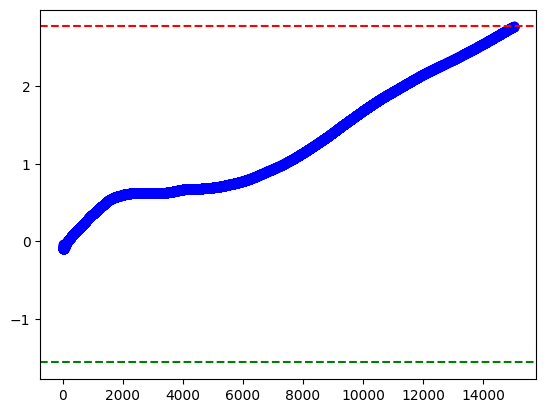

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("voter_turnout_averages.csv")

sum = 0
upper_bound = 2.77
lower_bound = -1.56

mean = df["vote_history_score"].mean()
print("mean", mean)

var = df["vote_history_score"].var()
print("variance:", var)

lambda_k = []
i_list = []

for i in range(len(df)):

    score = df["vote_history_score"].iloc[:i].sum() / (i+1)
    lambda_i = (score-0.8826)*(score-0.8826)-(score-.985)*(score-.985)

    sum += 0.16 * lambda_i
    lambda_k.append(sum)
    i_list.append(i)

    if sum < lower_bound:
        print("accept the null hypothesis")
        print(i)
        print(sum)
        print(score)
        break
    elif sum > upper_bound:
        print("accept the alternative hypothesis")
        print(i)
        print(sum)
        break

print(sum)



# Create the scatter plot
plt.scatter( i_list, lambda_k, label='Lambda_k over k', color='blue', marker='o')

# Plot the horizontal lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.axhline(y=lower_bound, color='green', linestyle='--', label=f'Lower Bound ({lower_bound})')





mean 0.7749562815344541
variance: 0.04893558674395324
0.2813416303934253


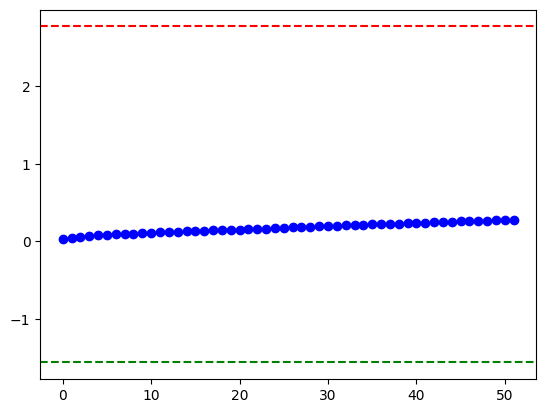

In [24]:
#for experimenting


# df = pd.read_csv("turnout_score_ntl.csv")
df = pd.read_csv("normal_voter_data.csv")

sum = 0

mean = df["turnout"].mean()
# mean = df["vote_history_score"].mean()
print("mean", mean)

var = df["turnout"].var()
# var = df["vote_history_score"].var()
print("variance:", var)

lambda_k = []
i_list = []

for i in range(len(df)):
    # if i == 3:
    #     print(df["vote_history_score"].iloc[i])
    # score = df["vote_history_score"].iloc[:i].sum() / (i+1)
    score = df["turnout"].iloc[:i].sum() / (i+1)
    add = (score-0.8826)*(score-0.8826)-(score-mean)*(score-mean)
    # add = ((score-mean)*(score-mean))-((score-0.8265)*(score-0.8265))

    sum += 0.16 * add
    # sum += (1/(2*var) * add)
    lambda_k.append(sum)
    i_list.append(i)

    if i > 50:
        break

    if sum < -1.56:
        print("accept the null hypothesis")
        print(i)
        print(sum)
        print(score)
        break
    elif sum > 2.77:
        print("accept the alternative hypothesis")
        print(i)
        print(sum)
        break

print(sum)

upper_bound = 2.77
lower_bound = -1.56

# Create the scatter plot
# plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter( i_list, lambda_k, label='Lambda_k over k', color='blue', marker='o')

# Plot the horizontal lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.axhline(y=lower_bound, color='green', linestyle='--', label=f'Lower Bound ({lower_bound})')
